# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I **Team, JL2**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### <u>__Predict Overview: EA - Twitter Sentiment Classification 2023-2024__</u>

* To be continued


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Text Preprocessing</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Model Training</a>

<a href=#seven>7. Model Perfomance</a>

<a href=#eifght>8. Model Evaluation - Testing set</a>

<a href=#nine>9. Best Model Explanation</a>

# 1. Importing Packages


In [ ]:
# Libraries of loading, manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import words
from textblob import TextBlob


# Libraries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import re
from wordcloud import WordCloud

#

# Downloads
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')

# Setting global constants to ensure notebook results are reproducible

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# 2.Loading Data

In [ ]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test_with_no_labels.csv')

# 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview

In [ ]:
# Shapes, Columns, Data types
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### 3.2 Data Dimensionality

In [ ]:
df_train.shape

(15819, 3)

- `Train data` has **15819** rows and **3** columns.

In [ ]:
df_test.shape

(10546, 2)

- `Test data` has **10546** rows and **2** columns.

### 3.3 Information Summmary

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Notable insight for `Train data`:
-  **Categoric**: **1** column of categorical type [`message`]
-  **Numerical**: **2** columns of Numeric type [`sentiment` & `tweetid`]
- **Null data**: Zero null values

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


Notable insight for `Test data`:
-  **Categoric**: **1** column of categorical type [`message`]
-  **Numerical**: **1** column of Numeric type [`tweetid`]
- **Null data**: Zero null values

### 3.4 Null value analysis

In [ ]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [ ]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

- Both `train data` & `test data` have **ZERO** null values.

### 3.5 Sentiment Class Distribution

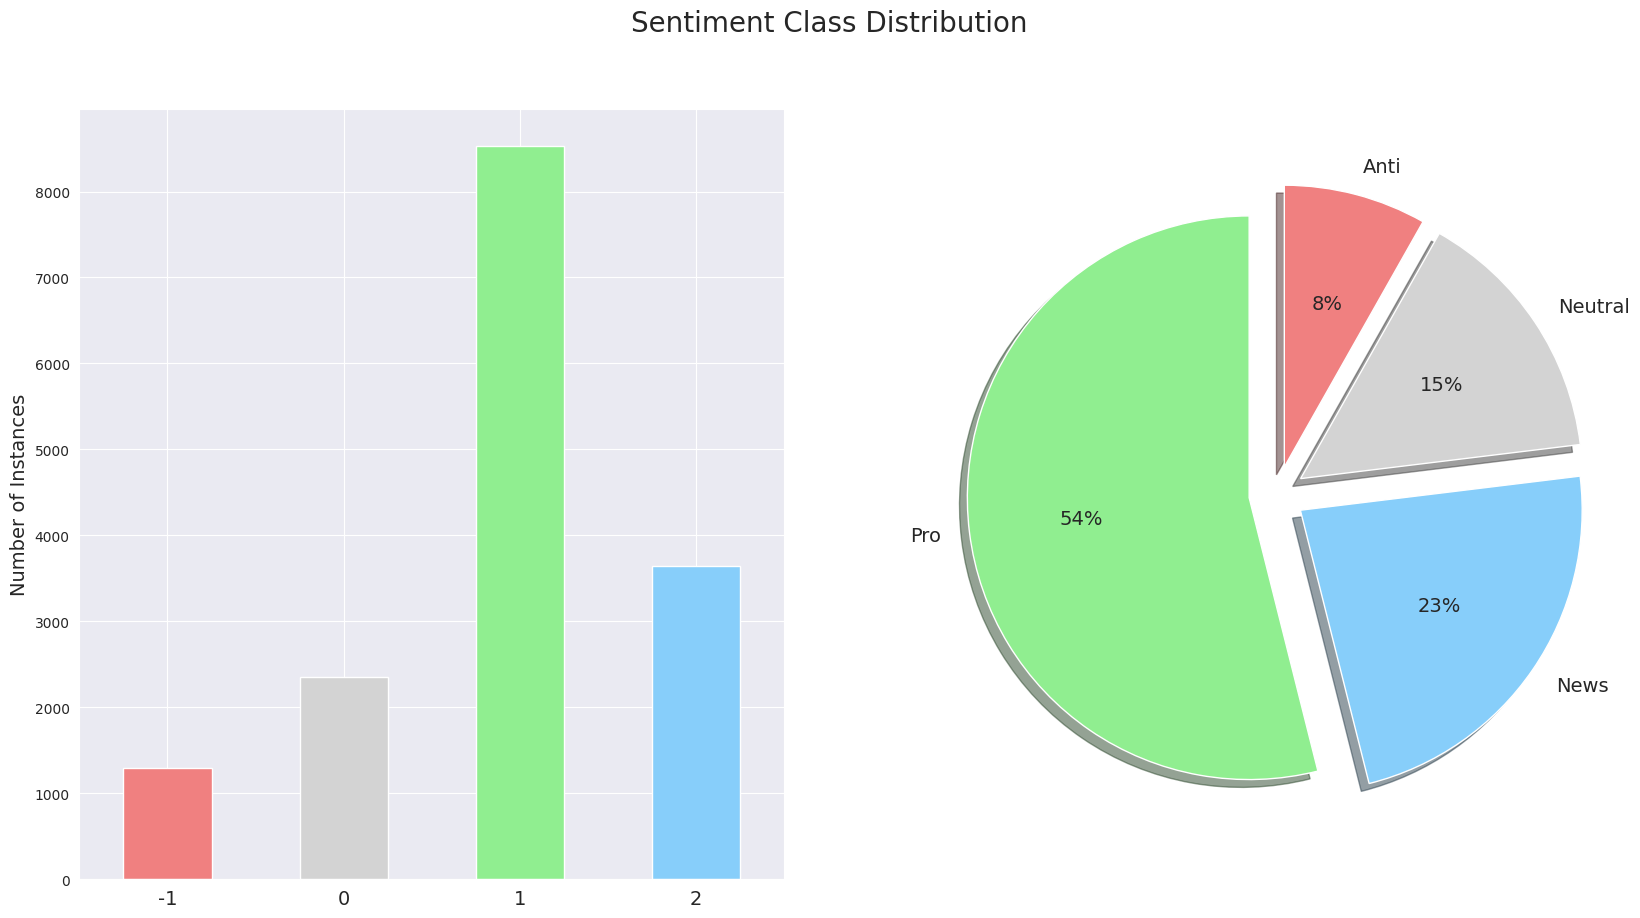

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color scheme with lighter shades
color_scheme = {'2': 'lightskyblue', '1': 'lightgreen', '0': 'lightgrey', '-1': 'lightcoral'}

# Set Seaborn style
sns.set_style('darkgrid')

fig, axes = plt.subplots(ncols=2,
                         nrows=1,
                         figsize=(20, 10),
                         dpi=100)

# Bar plot with color scheme using pandas
bar_plot = df_train['sentiment'].value_counts().sort_index().plot(kind='bar', color=[color_scheme[str(i)] for i in range(-1, 3)], ax=axes[0])
axes[0].set_ylabel('Number of Instances', fontsize=14)

# Adjust x-axis tick label rotation and make them bold
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, fontsize=14)  # Adjust font size

# Pie chart with color scheme
labels_pie = ['Pro', 'News', 'Neutral', 'Anti']  # Corrected labels
colors_pie = [color_scheme['1'], color_scheme['2'], color_scheme['0'], color_scheme['-1']]  # Corrected colors
axes[1].pie(df_train['sentiment'].value_counts(),
            labels=labels_pie,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode=(0.1, 0.1, 0.1, 0.1),
            colors=colors_pie,
            textprops={'fontsize': 14})  # Adjust font size

fig.suptitle('Sentiment Class Distribution', fontsize=20)
plt.show()


In [ ]:
import pandas as pd

# Assuming df_train is your training DataFrame
class_counts = df_train['sentiment'].value_counts().sort_index()

# Create a DataFrame for the counts
class_counts_df = pd.DataFrame({'Sentiment Class': class_counts.index, 'Count': class_counts.values})

# Display the table
print(class_counts_df)

   Sentiment Class  Count
0               -1   1296
1                0   2353
2                1   8530
3                2   3640


- Notable differences exist in the number of instances for each sentiment class, with `Pro (class 1)` having the **highest** number of observations(**54%**), and `Anti (class -1)` with the **lowest** number of observations(**8%**).
- The imbalance in class frequencies may pose a potential challenge for our machine learning models.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


- Comment!

# 4. Text Pre-Processing

#### Combine train & test data

In [ ]:
# Combine training and test data for preprocessing
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [ ]:
# Assuming df_train is your DataFrame
df_combined['sentiment'] = df_train['sentiment'].astype('int64')

In [ ]:
# Add a new column 'clean_message' with a copy of the original 'message' next to it
df_combined.insert(df_combined.columns.get_loc('message') + 1, 'clean_message', df_combined['message'].copy())

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_combined.shape

(26365, 4)

#### 4.1 Lowercasing

In [ ]:
df_combined['clean_message'] = df_combined['clean_message'].str.lower()

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,it's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt @rawstory: researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","rt @soynoviodetodas: it's 2016, and a racist, ...",466954


#### 4.1.2 Handle Hashtags(#)

In [ ]:
def hashtag_extract(tweet):

    hashtags = []

    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)

    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

df_temp_Hashtag = df_combined.iloc[:len(df_train)].copy()

# Extracting the hashtags from tweets in each class
pro_hashtag = hashtag_extract(df_temp_Hashtag['clean_message'][df_temp_Hashtag['sentiment'] == 1])
anti_hashtag = hashtag_extract(df_temp_Hashtag['clean_message'][df_temp_Hashtag['sentiment'] == -1])
neutral_hashtag = hashtag_extract(df_temp_Hashtag['clean_message'][df_temp_Hashtag['sentiment'] == 0])
news_hashtag = hashtag_extract(df_temp_Hashtag['clean_message'][df_temp_Hashtag['sentiment'] == 2])


#### 4.2 Removing URLs and User(@)

In [ ]:
df_combined['clean_message'] = df_combined['clean_message'].replace(r'http\S+', '', regex=True).replace(r'@[\w_]+', '', regex=True)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,it's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt : researchers say we have three years to ac...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","rt : it's 2016, and a racist, sexist, climate ...",466954


#### 4.3 Remove Punctuation & Special Characters

In [ ]:
df_combined['clean_message'] = df_combined['clean_message'].replace(r'[^\w\s]', '', regex=True)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",rt its 2016 and a racist sexist climate chang...,466954


#### 4.4 Remove RT

In [ ]:
# Replace 'RT' with an empty string in the 'clean_message' column
df_combined['clean_message'] = df_combined['clean_message'].replace(r'\brt\b', '', regex=True)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say we have three years to act o...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",its 2016 and a racist sexist climate change ...,466954


#### 4.5 Remove Special Characters & Handle Encoding

In [ ]:
# Remove special characters (handling encoding issues)
df_combined['clean_message'] = df_combined['clean_message'].replace(r'[^\x00-\x7F]+', '', regex=True)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say we have three years to act o...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",its 2016 and a racist sexist climate change ...,466954


#### 4.6 Remove repeating characters

In [ ]:
"""
def check_repeating_characters(dataframe, column_name='clean_message'):

    # Extract repeating characters from the specified column
    repeating_characters = dataframe[column_name].str.extract(r'((.)\2+)')

    # Check if any repeating characters were found
    repeating_characters_exist = not repeating_characters.isnull().all().all()

     # Print the result
    if repeating_characters_exist:
        print("Repeating characters exist in the '{}' column.".format(column_name))
    else:
        print("No repeating characters found in the '{}' column.".format(column_name))
"""

'\ndef check_repeating_characters(dataframe, column_name=\'clean_message\'):\n\n    # Extract repeating characters from the specified column\n    repeating_characters = dataframe[column_name].str.extract(r\'((.)\x02+)\')\n\n    # Check if any repeating characters were found\n    repeating_characters_exist = not repeating_characters.isnull().all().all()\n\n     # Print the result\n    if repeating_characters_exist:\n        print("Repeating characters exist in the \'{}\' column.".format(column_name))\n    else:\n        print("No repeating characters found in the \'{}\' column.".format(column_name))\n'

In [ ]:
#check_repeating_characters(df_combined)

In [ ]:
# Replace repeating characters with a single instance in the 'clean_message' column
#df_combined['clean_message'] = df_combined['clean_message'].replace(r'(.)\1+', r'\1', regex=True)

In [ ]:
#check_repeating_characters(df_combined)

#### 4.7 Remove numeric numbers

In [ ]:
# Remove numeric numbers from the 'clean_message' column
df_combined['clean_message'] = df_combined['clean_message'].replace(r'\d+', '', regex=True)

In [ ]:
# Filter rows where 'message' column had numbers
rows_with_numbers = df_combined[df_combined['message'].str.contains(r'\d+')]

# Display a sample of rows with 'message' and 'clean_message'
sample_rows_with_numbers = rows_with_numbers.sample(5)

sample_rows_with_numbers[['message', 'clean_message']]

,message,clean_message
26311,Harvests in the U.S. to suffer from climate ch...,harvests in the us to suffer from climate chan...
18366,RT @VanJones68: Want to resist Trump taking Am...,want to resist trump taking america backward...
8222,TAKE ACTION: Call Scott Pruitt and tell him to...,take action call scott pruitt and tell him to ...
3482,Canadian mayors encourage cities to play a str...,canadian mayors encourage cities to play a str...
17654,NatGeoÃ¢â‚¬â„¢s climate change documentary wit...,natgeos climate change documentary with leonar...


#### 4.8 Remove extra white space & leading space

In [ ]:
# Remove extra white spaces in the 'message' column
df_combined['clean_message'] = df_combined['clean_message'].str.replace('\s{2,}', ' ', regex=True)

# Remove leading spaces in the 'message' column
df_combined['clean_message'] = df_combined['clean_message'].str.lstrip()

#### 4.9 Remove Stopwords

In [ ]:
# A set of stop words
STOPWORDS = set(stopwords.words('english'))

# Function to clean stopwords from text
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
# Apply the function to the 'clean_message' column of df_combined
df_combined['clean_message'] = df_combined['clean_message'].apply(lambda text: cleaning_stopwords(text))

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,like lack evidence anthropogenic global warming,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say three years act climate change...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired pivotal year war climate ch...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",racist sexist climate change denying bigot lea...,466954


### 4.10 Normalization

#### 4.10.1 Tokenization

In [ ]:
# Function to tokenize a sentence
def tokenize_sentence(sentence):
    tokens = word_tokenize(sentence)
    return tokens

In [ ]:
# Apply tokenization to the 'message' column in df_train
df_combined['tokens'] = df_combined['clean_message'].apply(tokenize_sentence)


df_combined[['clean_message', 'tokens', 'sentiment']].head()

,clean_message,tokens,sentiment
0,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...",1.0
1,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...",1.0
2,researchers say we have three years to act o...,"[researchers, say, we, have, three, years, to,...",2.0
3,todayinmaker wired 2016 was a pivotal year in...,"[todayinmaker, wired, 2016, was, a, pivotal, y...",1.0
4,its 2016 and a racist sexist climate change ...,"[its, 2016, and, a, racist, sexist, climate, c...",1.0


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sentiment      15819 non-null  float64
 1   message        26365 non-null  object 
 2   clean_message  26365 non-null  object 
 3   tweetid        26365 non-null  int64  
 4   tokens         26365 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


#### 4.10.2 Lemmatization

In [ ]:
# Function to perform stemming on a sentence
from nltk.stem import WordNetLemmatizer

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)


In [ ]:
# Apply lemmatization to the 'tokens' column in df_combined
df_combined['lemmatized'] = df_combined['tokens'].apply(lambda tokens: [lemmatize_sentence(token) for token in tokens])

# Reorder columns to have 'lemamazied' next to 'tokens'
df_combined = df_combined[['tweetid','message','clean_message', 'tokens', 'lemmatized','sentiment']]

In [ ]:
df_combined[['tokens', 'lemmatized']].tail()

,tokens,lemmatized
26360,"[brb, writing, poem, climate, change, climatec...","[brb, writing, poem, climate, change, climatec..."
26361,"[year, climate, change, came, home, hottest, y...","[year, climate, change, came, home, hottest, y..."
26362,"[pacific, countries, positive, fiji, leading, ...","[pacific, country, positive, fiji, leading, gl..."
26363,"[youre, hot, must, cause, global, warming, ald...","[youre, hot, must, cause, global, warming, ald..."
26364,"[climate, change, global, issue, thats, gettin...","[climate, change, global, issue, thats, gettin..."


In [ ]:
df_combined.columns

Index(['tweetid', 'message', 'clean_message', 'tokens', 'lemmatized',
       'sentiment'],
      dtype='object')

In [ ]:
# Split the combinded data frame back to train & test data
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]

In [ ]:
# Check if they were correctly Seperated
print(df_train.shape)
print(df_test.shape)

(15819, 6)
(10546, 6)


In [ ]:
df_train.columns

Index(['tweetid', 'message', 'clean_message', 'tokens', 'lemmatized',
       'sentiment'],
      dtype='object')

In [ ]:
df_test.columns

Index(['tweetid', 'message', 'clean_message', 'tokens', 'lemmatized',
       'sentiment'],
      dtype='object')

# 5. Feature Engineering

### 5.1 Climate change trending words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def frequency_by_sentiment(tweet_series, sentiment_value):

    # Filter tweets for the specified sentiment class
    filtered_tweets = tweet_series[df_train['sentiment'] == sentiment_value]

    # Join the list of stemmed words into a space-separated string
    filtered_tweets_str = filtered_tweets.apply(lambda x: ' '.join(x))

    # Count vectorizer excluding English stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(filtered_tweets_str)

    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)

    return frequency


In [ ]:
# Extract the top 25 words in each class
pro_frequency = frequency_by_sentiment(df_train['lemmatized'],1)
anti_frequency = frequency_by_sentiment(df_train['lemmatized'],-1)
news_frequency = frequency_by_sentiment(df_train['lemmatized'],2)
neutral_frequency = frequency_by_sentiment(df_train['lemmatized'],0)

In [ ]:
# Extract the words in the tweets for the pro and anti climate change classes
anti_words = ' '.join([text for text in anti_frequency['word']])
pro_words = ' '.join([text for text in pro_frequency['word']])
news_words = ' '.join([text for text in news_frequency['word']])
neutral_words = ' '.join([text for text in neutral_frequency['word']])

# Create word clouds with adjusted parameters
anti_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Reds", random_state=73).generate(anti_words)
pro_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Greens", random_state=23).generate(pro_words)
news_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Blues", random_state=11).generate(news_words)
neutral_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Greys", random_state=11).generate(neutral_words)


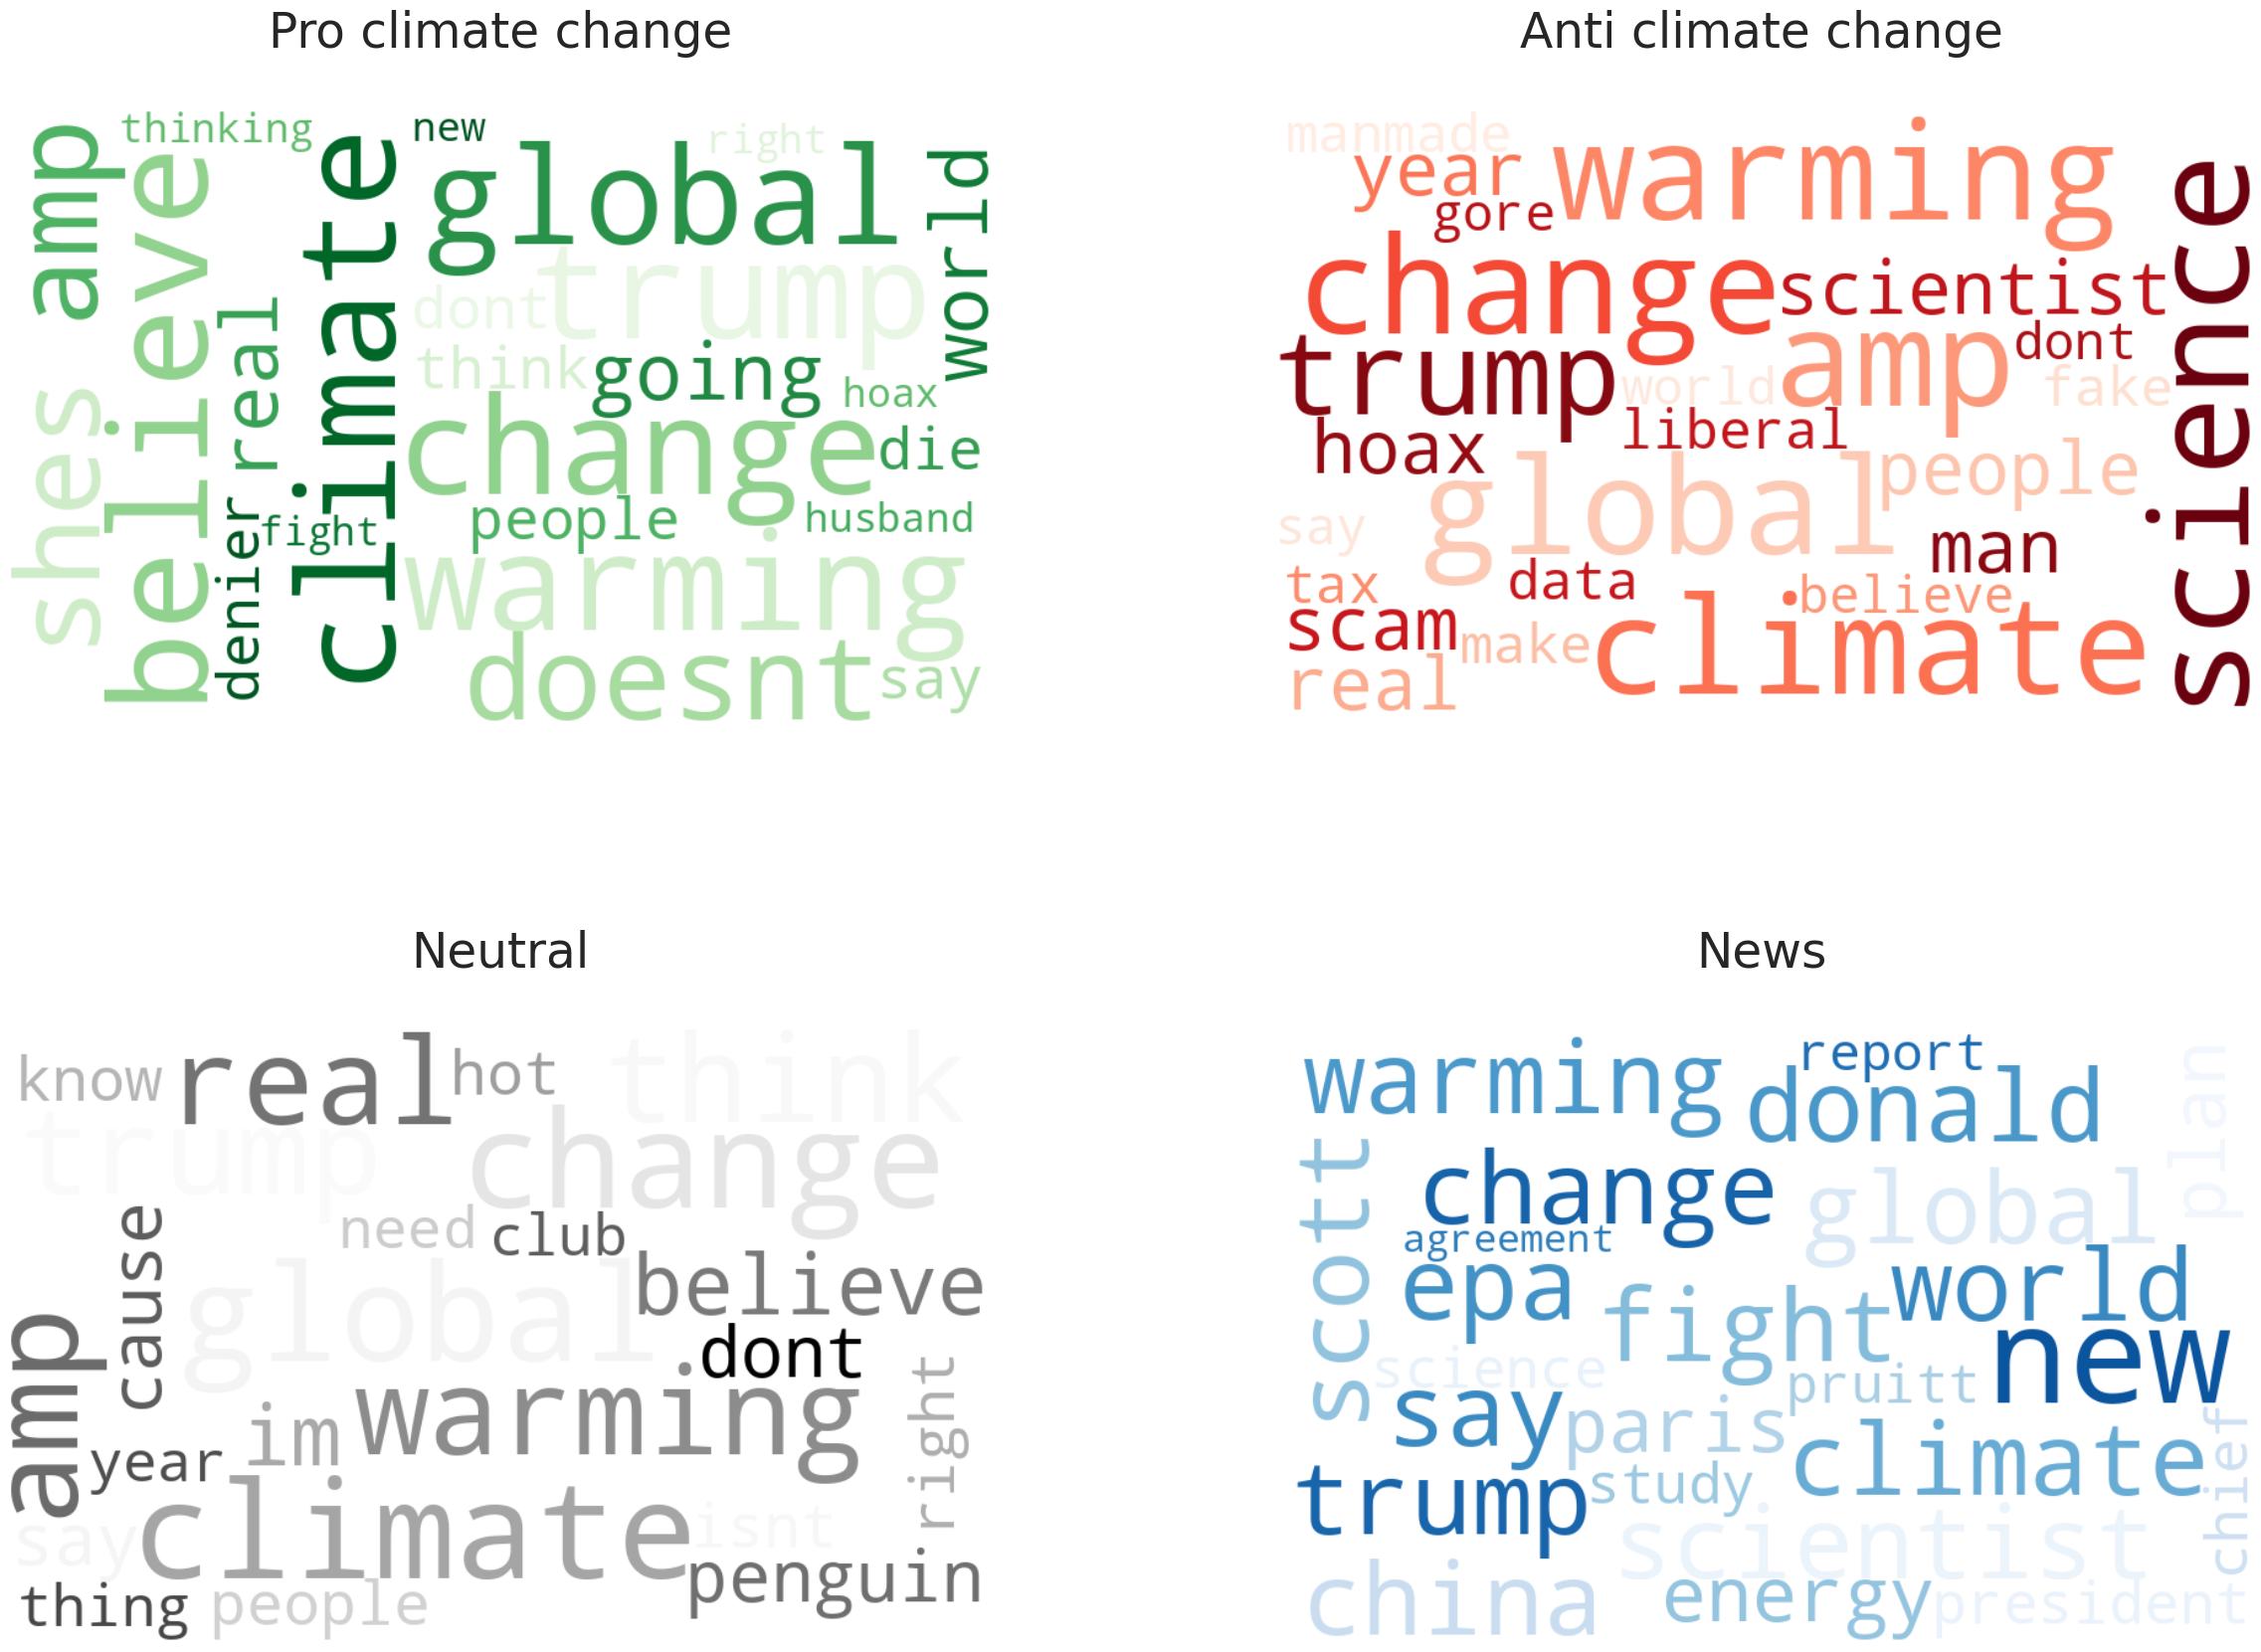

In [ ]:
# ... (code for generating word clouds)

# Plot pro and anti word clouds next to one another for comparison
f, axarr = plt.subplots(2, 2, figsize=(30, 20))

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust hspace as needed

axarr[0, 0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0, 1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1, 0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1, 1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0, 0].set_title('Pro climate change\n', fontsize=35)
axarr[0, 1].set_title('Anti climate change\n', fontsize=35)
axarr[1, 0].set_title('Neutral\n', fontsize=35)
axarr[1, 1].set_title('News\n', fontsize=35)

# Uncomment the line below for better layout
#plt.tight_layout()



plt.show()


- Insights to be added!!

### 5.2 Hashtags

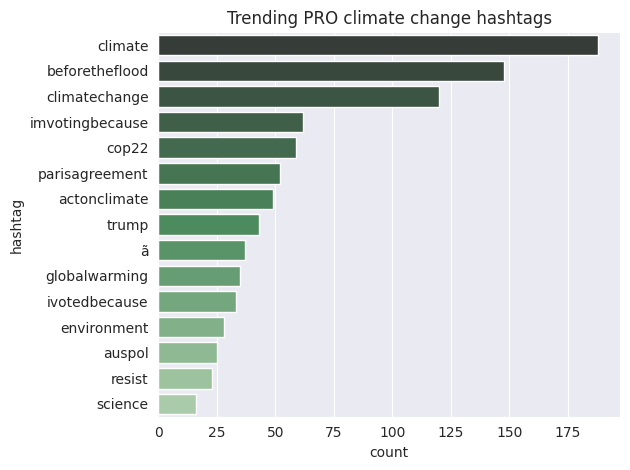

In [ ]:
# Plot a bar chart with the specified palette and adjusted concentration
# Get the number of unique hashtags
num_hashtags_1 = len(pro_hashtag['hashtag'].unique())

# Manually create a custom green color palette with reversed concentration
pro_palette = sns.color_palette("Greens_d", n_colors=num_hashtags_1 ,desat=0.8)[::-1]

# Plot a bar chart with the specified custom palette
sns.barplot(data=pro_hashtag, y='hashtag', x='count', palette=pro_palette)
plt.title('Trending PRO climate change hashtags')
plt.tight_layout()
plt.show()

- Insights to be added

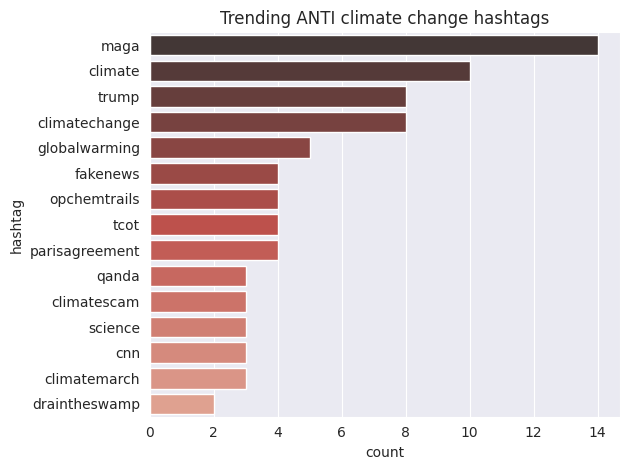

In [ ]:
# Plot a bar chart with the specified palette and adjusted concentration

num_hashtags_2 = len(anti_hashtag['hashtag'].unique())

# Manually create a custom green color palette with reversed concentration
anti_palette = sns.color_palette("Reds_d", n_colors=num_hashtags_2, desat=0.8)[::-1]

# Plot a bar chart with the specified custom palette
sns.barplot(data=anti_hashtag, y='hashtag', x='count', palette=anti_palette)
plt.title('Trending ANTI climate change hashtags')
plt.tight_layout()
plt.show()

- Add insights later

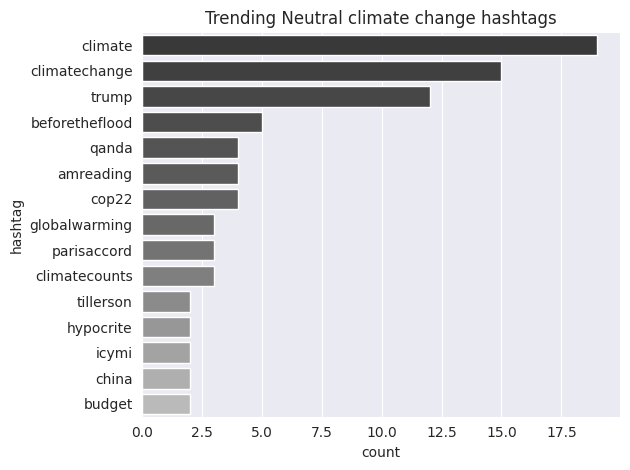

In [ ]:
# Plot a bar chart with the specified palette and adjusted concentration

num_hashtags_3 = len(anti_hashtag['hashtag'].unique())

# Manually create a custom green color palette with reversed concentration
neutral_palette = sns.color_palette("Greys_d", n_colors=num_hashtags_3, desat=0.8)[::-1]

# Plot a bar chart with the specified custom palette
sns.barplot(data=neutral_hashtag, y='hashtag', x='count', palette=neutral_palette)
plt.title('Trending Neutral climate change hashtags')
plt.tight_layout()
plt.show()

- Add insights

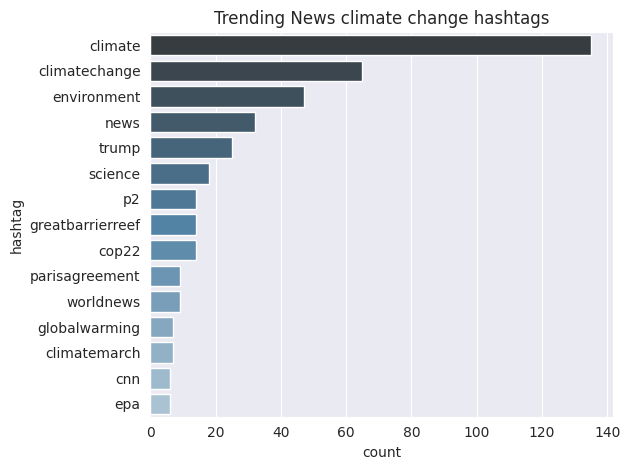

In [ ]:
# Plot a bar chart with the specified palette and adjusted concentration

num_hashtags_4 = len(anti_hashtag['hashtag'].unique())

# Manually create a custom green color palette with reversed concentration
neutral_palette = sns.color_palette("Blues_d", n_colors=num_hashtags_4, desat=0.8)[::-1]

# Plot a bar chart with the specified custom palette
sns.barplot(data=news_hashtag, y='hashtag', x='count', palette=neutral_palette)
plt.title('Trending News climate change hashtags')
plt.tight_layout()
plt.show()

- Insights to be added

In [ ]:
# Check if they were correctly Seperated
print(df_train.shape)
print(df_test.shape)

(15819, 6)
(10546, 6)


### 5.4 Emotional tone scores

## Modeling preparation

In [ ]:
# Feature Selection, Data Split, Data Scaling etc

In [ ]:
df_train.columns

Index(['tweetid', 'message', 'clean_message', 'tokens', 'lemmatized',
       'sentiment'],
      dtype='object')

In [ ]:
#df_train['lemmatized'] = df_train['lemmatized'].apply(np.array)


In [ ]:
"""
import pandas as pd
from sklearn.utils import resample

# Assuming df_train is your training DataFrame
class_counts = df_train['sentiment'].value_counts().sort_index()

# Create a DataFrame for the counts
class_counts_df = pd.DataFrame({'Sentiment Class': class_counts.index, 'Count': class_counts.values})

# Identify the majority class
majority_class = df_train[df_train['sentiment'] == class_counts.idxmax()]

# Set the desired number of samples for each class (e.g., the count of the minority class)
desired_samples = class_counts.min()

# Undersample the majority class
undersampled_majority_class = resample(
    majority_class,
    replace=False,  # Set to False for undersampling without replacement
    n_samples=desired_samples,  # Set the desired number of samples
    random_state=42  # Set a random seed for reproducibility
)

# Combine the undersampled majority class with the minority classes
undersampled_df_train = pd.concat([undersampled_majority_class, df_train[df_train['sentiment'] != class_counts.idxmax()]])

# Display the undersampled data
undersampled_df_train
"""

"\nimport pandas as pd\nfrom sklearn.utils import resample\n\n# Assuming df_train is your training DataFrame\nclass_counts = df_train['sentiment'].value_counts().sort_index()\n\n# Create a DataFrame for the counts\nclass_counts_df = pd.DataFrame({'Sentiment Class': class_counts.index, 'Count': class_counts.values})\n\n# Identify the majority class\nmajority_class = df_train[df_train['sentiment'] == class_counts.idxmax()]\n\n# Set the desired number of samples for each class (e.g., the count of the minority class)\ndesired_samples = class_counts.min()\n\n# Undersample the majority class\nundersampled_majority_class = resample(\n    majority_class,\n    replace=False,  # Set to False for undersampling without replacement\n    n_samples=desired_samples,  # Set the desired number of samples\n    random_state=42  # Set a random seed for reproducibility\n)\n\n# Combine the undersampled majority class with the minority classes\nundersampled_df_train = pd.concat([undersampled_majority_class, d

In [ ]:
""" # Assuming df_train is your training DataFrame
class_counts = undersampled_df_train['sentiment'].value_counts().sort_index()
# Create a DataFrame for the counts
class_counts_df = pd.DataFrame({'Sentiment Class': class_counts.index, 'Count': class_counts.values})
print(class_counts_df)
"""


" # Assuming df_train is your training DataFrame\nclass_counts = undersampled_df_train['sentiment'].value_counts().sort_index()\n# Create a DataFrame for the counts\nclass_counts_df = pd.DataFrame({'Sentiment Class': class_counts.index, 'Count': class_counts.values})\nprint(class_counts_df)\n"

### Datasplit

In [ ]:
X = df_train['tokens']
Y = df_train['sentiment']


# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.35, random_state=42)


# 6. Model Training

### 6.1 Random Forest

In [ ]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Random Forest classifier
rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', rf_classifier),
])

# Fit the model on the training data
rf_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
y_pred = rf_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)

Accuracy: 0.6930

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.88      0.21      0.34       456
         0.0       0.58      0.31      0.40       785
         1.0       0.69      0.90      0.78      3031
         2.0       0.74      0.62      0.67      1265

    accuracy                           0.69      5537
   macro avg       0.72      0.51      0.55      5537
weighted avg       0.70      0.69      0.66      5537



In [ ]:
# Assuming df_test['lemmatized'] contains the test data

# Predictions on the test set using Random Forest
rf_test_predictions = rf_pipeline.predict(df_test['lemmatized'].apply(lambda x: ' '.join(x)))

# Create a DataFrame to store the results
rf_result_df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'predicted_sentiment': rf_test_predictions
})

# Display the results
print(rf_result_df.head())

# Optionally, save the results to a CSV file
rf_result_df.to_csv('rf_predictions.csv', index=False)


       tweetid  predicted_sentiment
15819   169760                  1.0
15820    35326                  1.0
15821   224985                  1.0
15822   476263                  1.0
15823   872928                  0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_validation, y_validation are your training and validation data
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with TF-IDF vectorizer, RandomOverSampler, and Random Forest classifier
rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('ros', RandomOverSampler(random_state=42)),
    ('clf', rf_classifier),
])

# Fit the model on the training data
rf_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
y_pred = rf_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)

Accuracy: 0.6896

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.70      0.33      0.45       278
         0.0       0.47      0.44      0.45       425
         1.0       0.77      0.77      0.77      1755
         2.0       0.64      0.77      0.70       706

    accuracy                           0.69      3164
   macro avg       0.64      0.58      0.59      3164
weighted avg       0.69      0.69      0.68      3164



### 6.2 Logistic Regression

In [ ]:
# Create a Logistic Regression classifier with corrected regularization parameter (C)
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000, C=10)

# Create a pipeline with TF-IDF vectorizer and Logistic Regression classifier
logreg_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', logreg_classifier),
])

# Fit the model on the training data
logreg_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
logreg_y_pred = logreg_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_validation, logreg_y_pred)
logreg_classification_rep = classification_report(y_validation, logreg_y_pred)

print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}\n')
print('Logistic Regression Classification Report:\n', logreg_classification_rep)

Logistic Regression Accuracy: 0.7235

Logistic Regression Classification Report:
               precision    recall  f1-score   support

        -1.0       0.66      0.43      0.52       278
         0.0       0.52      0.46      0.49       425
         1.0       0.76      0.83      0.80      1755
         2.0       0.74      0.73      0.73       706

    accuracy                           0.72      3164
   macro avg       0.67      0.61      0.63      3164
weighted avg       0.72      0.72      0.72      3164



In [ ]:
# Assuming df_test['lemmatized'] contains the test data

# Predictions on the test set using Logistic Regression
logreg_test_predictions = logreg_pipeline.predict(df_test['lemmatized'].apply(lambda x: ' '.join(x)))

# Create a DataFrame to store the results
logreg_result_df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'predicted_sentiment': logreg_test_predictions
})

# Display the results
print(logreg_result_df.head())

# Optionally, save the results to a CSV file
logreg_result_df.to_csv('logreg_predictions.csv', index=False)


       tweetid  predicted_sentiment
15819   169760                  1.0
15820    35326                  1.0
15821   224985                  1.0
15822   476263                  1.0
15823   872928                  0.0


### 6.3 Support Vector Machine

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', random_state=42, gamma= 2 , C= 10)

# Create a pipeline with TF-IDF vectorizer and SVM classifier
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', svm_classifier),
])

# Fit the model on the training data
svm_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
svm_y_pred = svm_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_validation, svm_y_pred)
svm_classification_rep = classification_report(y_validation, svm_y_pred)

print(f'SVM Accuracy: {svm_accuracy:.4f}\n')
print('SVM Classification Report:\n', svm_classification_rep)


SVM Accuracy: 0.7078

SVM Classification Report:
               precision    recall  f1-score   support

        -1.0       0.97      0.16      0.27       456
         0.0       0.76      0.23      0.35       785
         1.0       0.67      0.95      0.79      3031
         2.0       0.84      0.62      0.71      1265

    accuracy                           0.71      5537
   macro avg       0.81      0.49      0.53      5537
weighted avg       0.75      0.71      0.67      5537



In [ ]:
# Assuming df_test['lemmatized'] contains the test data

# Predictions on the test set
svm_test_predictions = svm_pipeline.predict(df_test['lemmatized'].apply(lambda x: ' '.join(x)))

# Create a DataFrame to store the results
result_df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'predicted_sentiment': svm_test_predictions
})

# Display the results
print(result_df.head())

# Optionally, save the results to a CSV file
result_df.to_csv('svm_predictions.csv', index=False)


       tweetid  predicted_sentiment
15819   169760                  1.0
15820    35326                  1.0
15821   224985                  1.0
15822   476263                  1.0
15823   872928                  0.0


### 6.4 Naive Bayes

In [ ]:
# Create a Naive Bayes classifier (Multinomial Naive Bayes for text classification)
naive_bayes_classifier = MultinomialNB()

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
naive_bayes_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', naive_bayes_classifier),
])

# Fit the model on the training data
naive_bayes_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
naive_bayes_y_pred = naive_bayes_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the Naive Bayes model
naive_bayes_accuracy = accuracy_score(y_validation, naive_bayes_y_pred)
naive_bayes_classification_rep = classification_report(y_validation, naive_bayes_y_pred)

print(f'Naive Bayes Accuracy: {naive_bayes_accuracy:.4f}\n')
print('Naive Bayes Classification Report:\n', naive_bayes_classification_rep)


Naive Bayes Accuracy: 0.6612

Naive Bayes Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      0.02      0.04       278
         0.0       0.97      0.07      0.13       425
         1.0       0.63      0.98      0.76      1755
         2.0       0.87      0.49      0.62       706

    accuracy                           0.66      3164
   macro avg       0.87      0.39      0.39      3164
weighted avg       0.76      0.66      0.58      3164



### 6.5 KNeighbors Classifier

In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create a pipeline with TF-IDF vectorizer and KNN classifier
knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', knn_classifier),
])

# Fit the model on the training data
knn_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
knn_y_pred = knn_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_validation, knn_y_pred)
knn_classification_rep = classification_report(y_validation, knn_y_pred)

print(f'KNN Accuracy: {knn_accuracy:.4f}\n')
print('KNN Classification Report:\n', knn_classification_rep)

KNN Accuracy: 0.6460

KNN Classification Report:
               precision    recall  f1-score   support

        -1.0       0.48      0.37      0.42       278
         0.0       0.41      0.41      0.41       425
         1.0       0.73      0.75      0.74      1755
         2.0       0.62      0.64      0.63       706

    accuracy                           0.65      3164
   macro avg       0.56      0.54      0.55      3164
weighted avg       0.64      0.65      0.64      3164



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train are your training data
X_train_array = X_train.apply(lambda x: ' '.join(x)).values  # Convert Series to NumPy array

# Use TF-IDF vectorizer to convert text data to numerical format
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_array)

# Reshape X_train_tfidf if needed (depends on the structure of your data)
# X_train_tfidf = X_train_tfidf.reshape(X_train_tfidf.shape[0], -1)

X_train_resampled, y_train_resampled = RandomOverSampler(random_state=42).fit_resample(X_train_tfidf, y_train)

# Train your model on the resampled data
clf_resampled = RandomForestClassifier(n_estimators=20, random_state=42)
clf_resampled.fit(X_train_resampled, y_train_resampled)

# Assuming X_validation, y_validation are your validation data
X_validation_array = X_validation.apply(lambda x: ' '.join(x)).values  # Convert Series to NumPy array
X_validation_tfidf = tfidf_vectorizer.transform(X_validation_array)

# Test on the original validation set
y_pred_resampled = clf_resampled.predict(X_validation_tfidf)
print("Accuracy on the resampled validation set:", accuracy_score(y_validation, y_pred_resampled))


Accuracy on the resampled validation set: 0.6801517067003793


In [ ]:
#decission tree

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, y_train, X_validation, and y_validation are defined
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a pipeline with TF-IDF vectorizer and Decision Tree classifier
dt_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', dt_classifier),
])

# Fit the model on the training data
dt_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Transform the validation data
X_validation_tfidf = tfidf_vectorizer.transform(X_validation.apply(lambda x: ' '.join(x)))

# Apply PCA for dimensionality reduction
pca = TruncatedSVD(n_components=2)
X_validation_pca = pca.fit_transform(X_validation_tfidf)

# Convert y_validation to integers
y_validation_int = y_validation.astype(np.int_)

# Visualize decision boundaries (Note: Decision Trees are visualized differently than SVMs)
# plot_decision_regions(X_validation_pca, y_validation_int.values, clf=dt_pipeline, legend=2)

# Evaluate the Decision Tree model
dt_y_pred = dt_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))
dt_accuracy = accuracy_score(y_validation, dt_y_pred)
dt_classification_rep = classification_report(y_validation, dt_y_pred)

print(f'Decision Tree Accuracy: {dt_accuracy:.4f}\n')
print('Decision Tree Classification Report:\n', dt_classification_rep)

Decision Tree Accuracy: 0.6144

Decision Tree Classification Report:
               precision    recall  f1-score   support

        -1.0       0.41      0.28      0.33       278
         0.0       0.36      0.33      0.35       425
         1.0       0.71      0.72      0.71      1755
         2.0       0.58      0.65      0.61       706

    accuracy                           0.61      3164
   macro avg       0.51      0.50      0.50      3164
weighted avg       0.61      0.61      0.61      3164



In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train, X_validation, and y_validation are defined
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a pipeline with TF-IDF vectorizer and Decision Tree classifier
dt_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', dt_classifier),
])

# Define the parameter grid to search
param_grid = {
    'clf__criterion': ['gini'],
    'clf__max_depth': [40],
    'clf__min_samples_split': [2],
    'clf__min_samples_leaf': [1]
}

# Perform Grid Search
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_dt_model.predict(X_validation.apply(lambda x: ' '.join(x)))
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

print(f'Best Decision Tree Accuracy: {accuracy:.4f}\n')
print('Best Decision Tree Classification Report:\n', classification_rep)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:  {'clf__criterion': 'gini', 'clf__max_depth': 40, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best Accuracy:  0.6107467404188067
Best Decision Tree Accuracy: 0.6271

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

        -1.0       0.46      0.17      0.24       278
         0.0       0.42      0.29      0.34       425
         1.0       0.66      0.83      0.74      1755
         2.0       0.63      0.50      0.56       706

    accuracy                           0.63      3164
   macro avg       0.54      0.45      0.47      3164
weighted avg       0.60      0.63      0.60      3164



# 7. Model Perfomance

In [ ]:
# Use various Metrics to evaluate each model's perfomance

# 8. Model Evaluation - Testing set

In [ ]:
# Evaluate the best model on the testing set

# 9. Best Model Explanation

# Submission

In [ ]:
# Create a submission file


Ridge Classfier
Extra Trees Classifier
Gradient Boosting Classifier
Light Gradient Boosting Machine
Extreme Gradient Boosting

SyntaxError: ignored